In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC

<h1>Part 1: Dataset Analysis</h1>

In [2]:
dataPath = "DataSet.csv"
dataset = pd.read_csv(dataPath)
display(dataset)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,NaN,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<h2>1-describe and info</h2>

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     480 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      479 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     452 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


<p>As the info() method shows, the dataset has 14 columns and 506 rows. The columns are described as follows:</p>
<ul style="display: flex; flex-direction: column; gap: 10px;">
 <li>CRIM: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>ZN: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:integer(float64 in dataset because of missing values)</div></li>
 <li>INDUS: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>CHAS: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:integer(float64 in dataset because of missing values)</div></li>
 <li>NOX: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>RM: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>AGE: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>DIS: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>RAD: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:integer</div></li>
 <li>TAX: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>PRTATIO: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>B: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
 <li>LSTAT: <div style="padding:0px 5px 0px 5px;background-color:gray;color:black">type:float64</div></li>
</ul>

In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,480.000000,506.000000,506.000000,506.000000,479.000000,506.000000,506.000000,506.000000,486.000000,506.000000,452.000000
mean,1.269195,13.295257,9.205158,0.175000,1.101175,15.679800,58.744660,6.211663,78.063241,339.317787,42.614980,336.820947,11.537806,23.750442
std,2.399207,23.048697,7.169630,0.380364,1.646991,27.220206,33.104049,6.527286,203.542157,180.670077,87.585243,121.174519,6.064932,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.425900,4.000000,254.000000,17.000000,370.415000,6.877500,18.500000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.885000,10.380000,21.950000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.341400,24.000000,403.000000,20.200000,395.630000,15.015000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


<p>describe method show bellow informaton for each featur:</p>
<ul>
 <li>count:number of non-missing values</li>
 <li>mean:Mean of the values</li>
 <li>std:Standard deviation of the values</li>
 <li>min:Minimum of values</li>
 <li>25%:First quartile</li>
 <li>50%:median of values</li>
 <li>75%:Third quartile</li>
 <li>max:Maximum of value</li>
</ul>

<h2>2-number of missing values and their ratio in dataset</h2>

In [5]:
rowNumber = dataset.shape[0]
for column in dataset.columns:
    Nan = dataset[column].isna().sum()
    print(f"number of NaN values in column {column:5}-> {Nan:3} ({Nan/rowNumber*100:5.2f}%)")

number of NaN values in column CRIM ->   0 ( 0.00%)
number of NaN values in column ZN   ->   0 ( 0.00%)
number of NaN values in column INDUS->   0 ( 0.00%)
number of NaN values in column CHAS ->  26 ( 5.14%)
number of NaN values in column NOX  ->   0 ( 0.00%)
number of NaN values in column RM   ->   0 ( 0.00%)
number of NaN values in column AGE  ->   0 ( 0.00%)
number of NaN values in column DIS  ->  27 ( 5.34%)
number of NaN values in column RAD  ->   0 ( 0.00%)
number of NaN values in column TAX  ->   0 ( 0.00%)
number of NaN values in column PTRATIO->   0 ( 0.00%)
number of NaN values in column B    ->  20 ( 3.95%)
number of NaN values in column LSTAT->   0 ( 0.00%)
number of NaN values in column MEDV ->  54 (10.67%)


<h2>3-plotting Unique Value for features</h2>
<p>this code generates a series of count plots, one for each feature (column) in the dataset. Each plot shows the distribution of unique values for that feature. This is useful for understanding the frequency distribution of categorical variables in the dataset.</p>

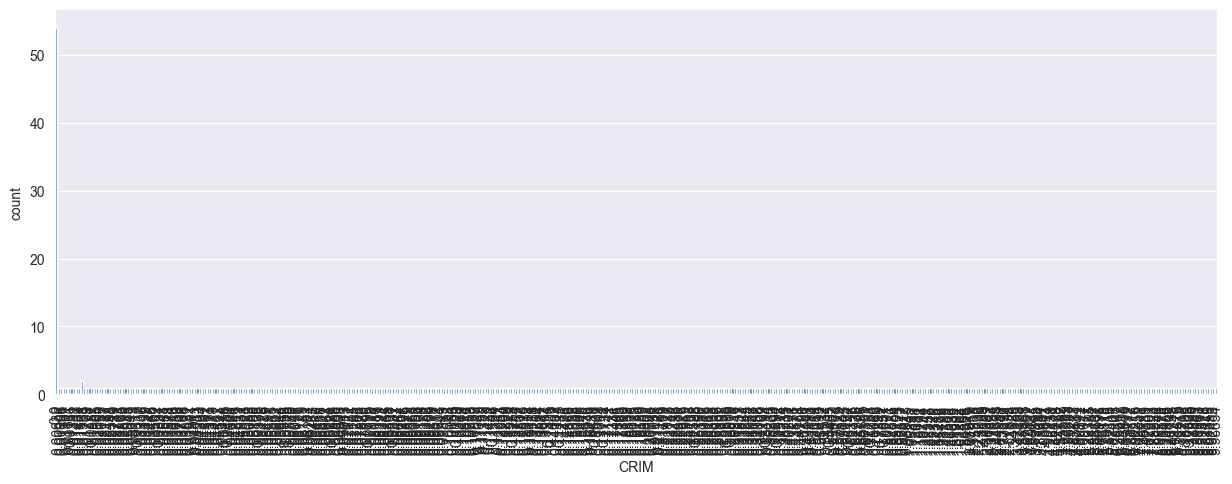

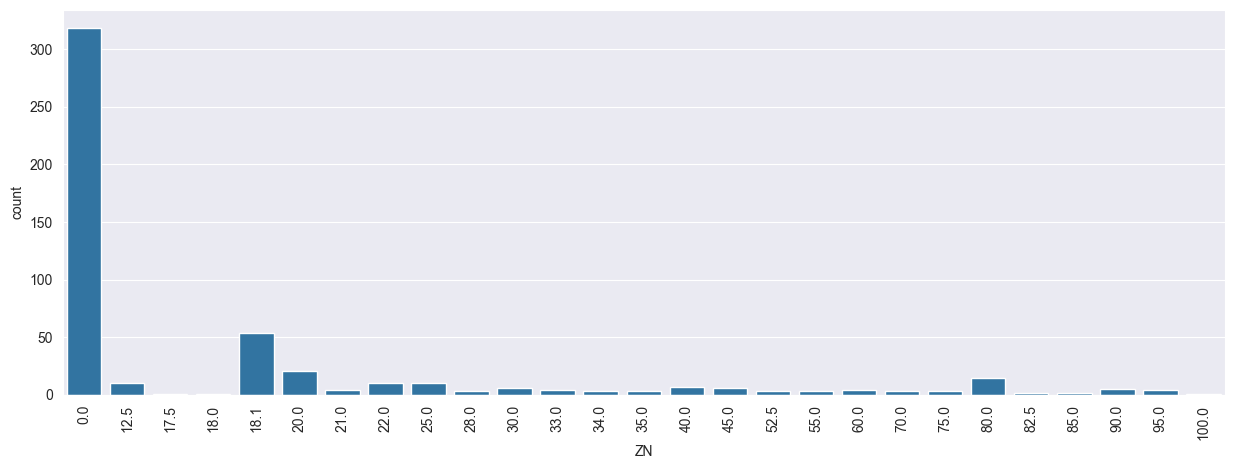

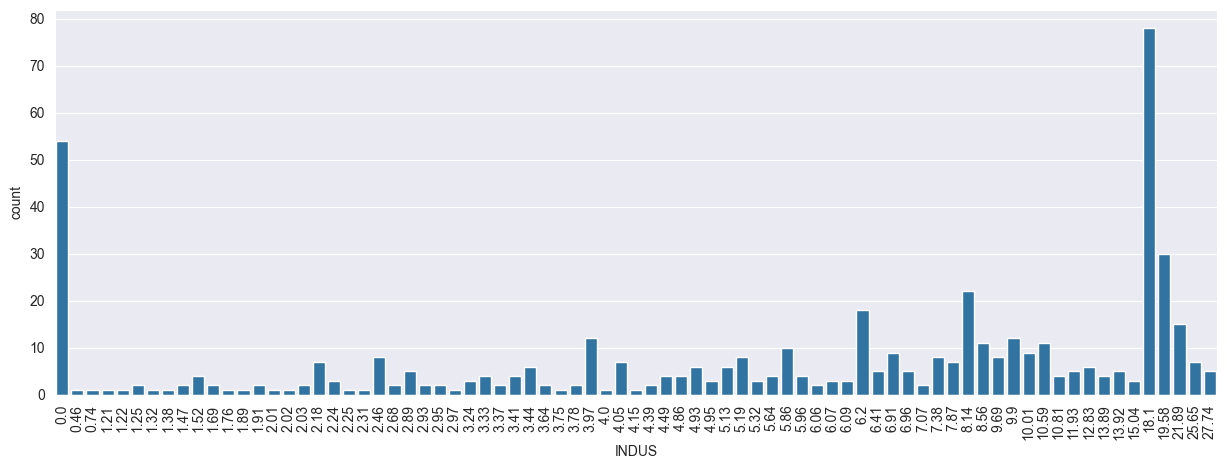

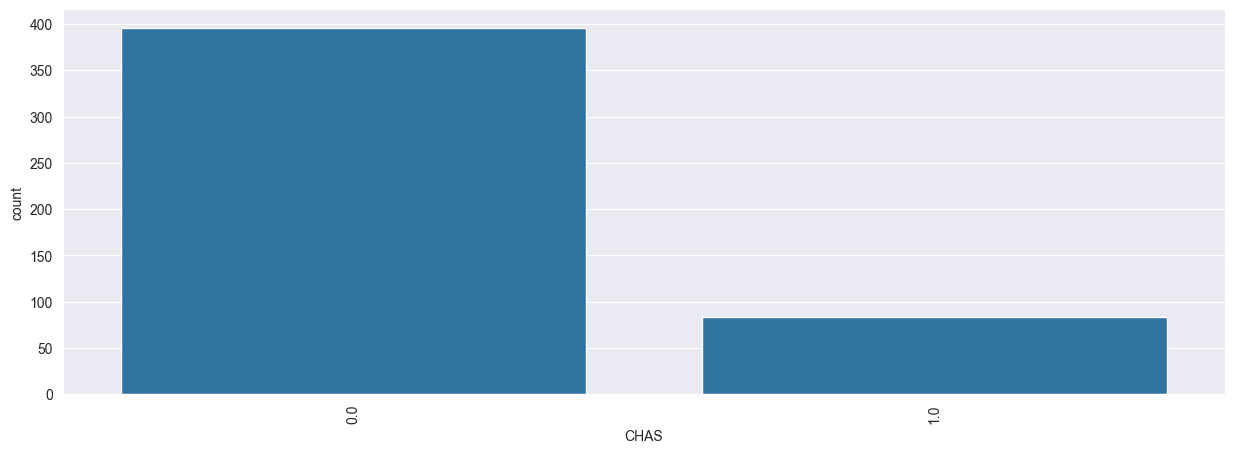

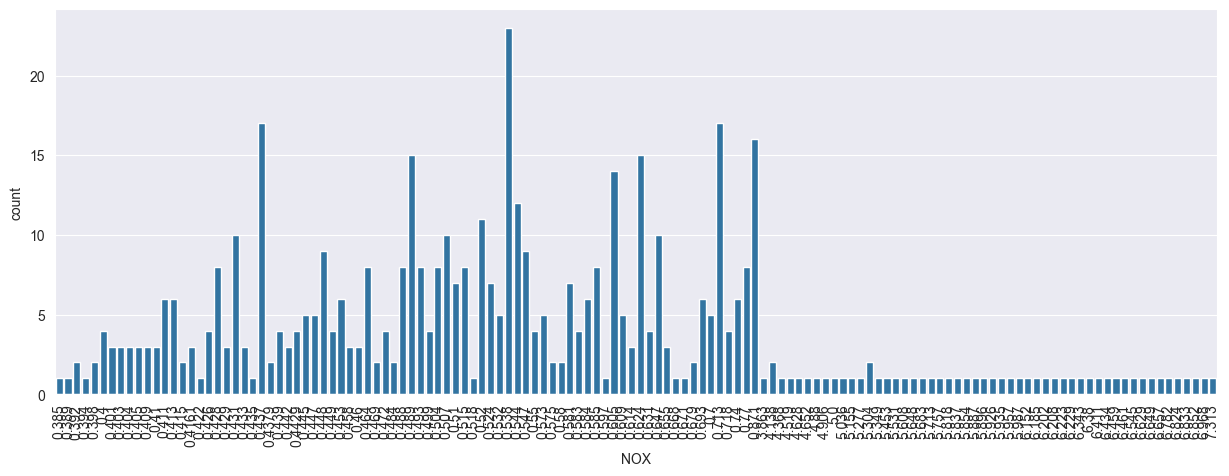

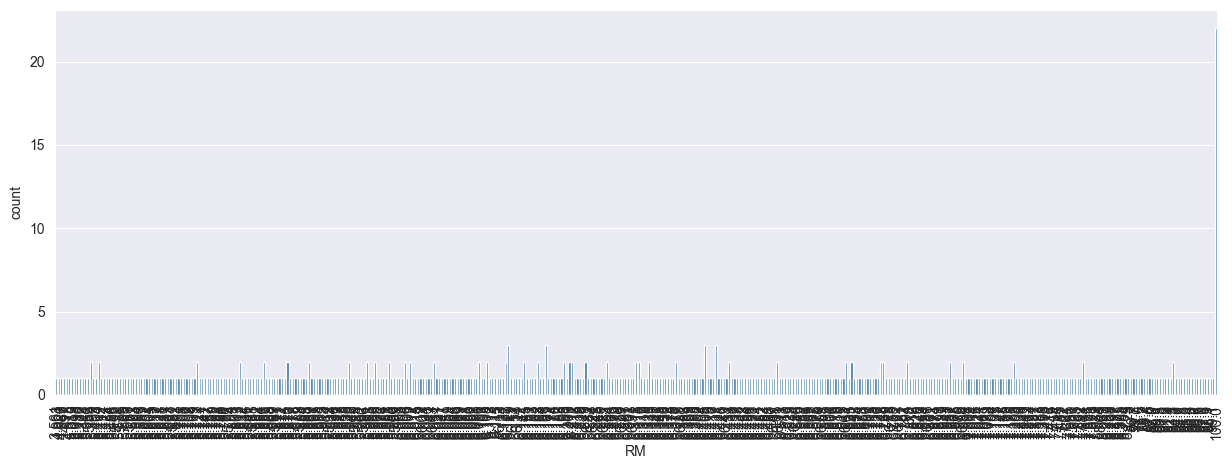

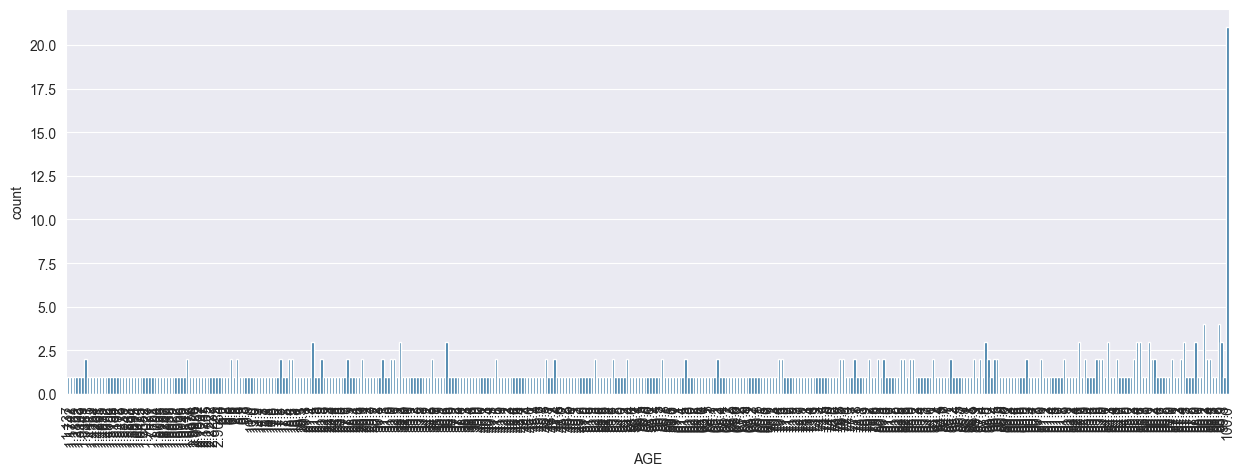

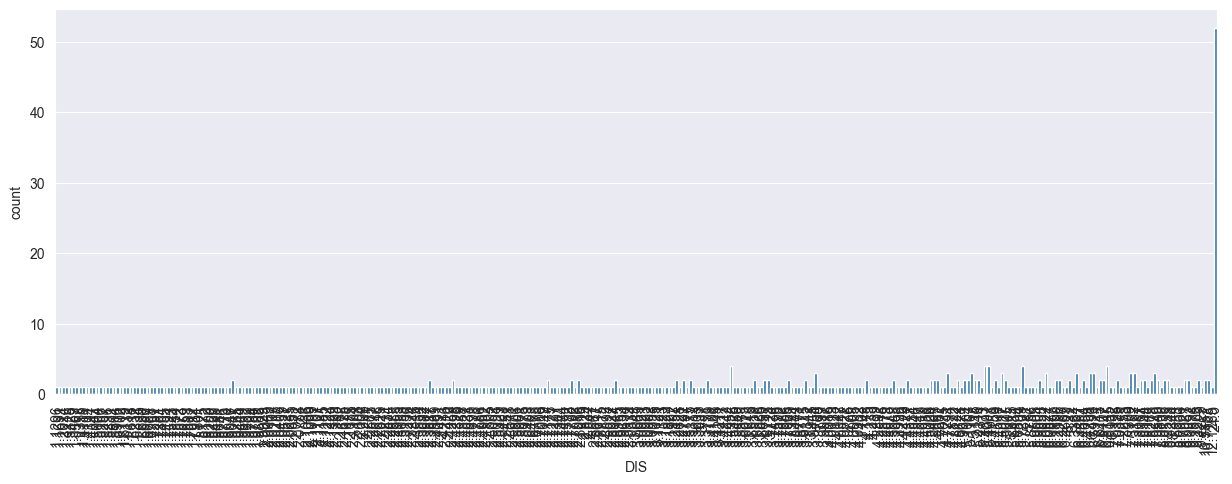

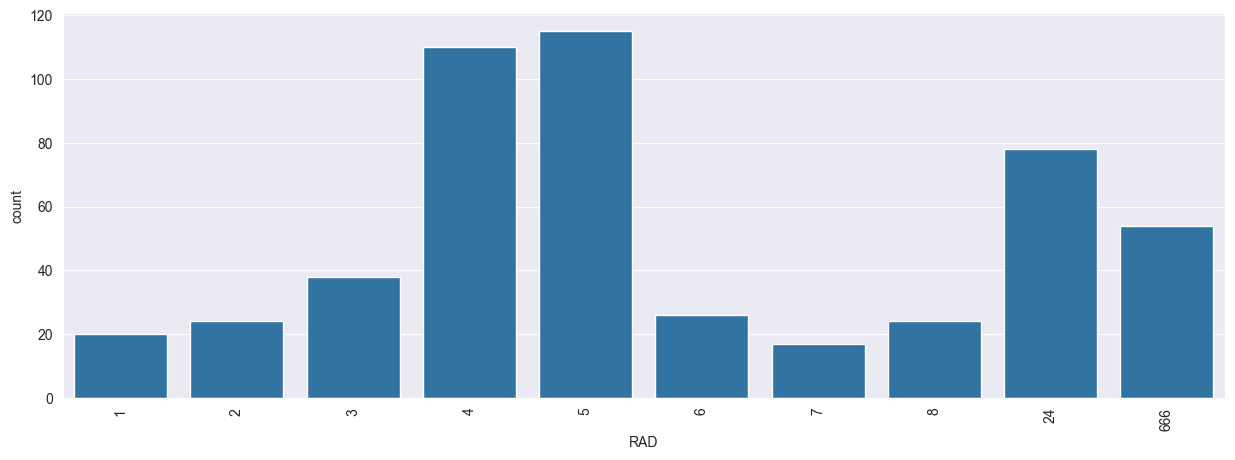

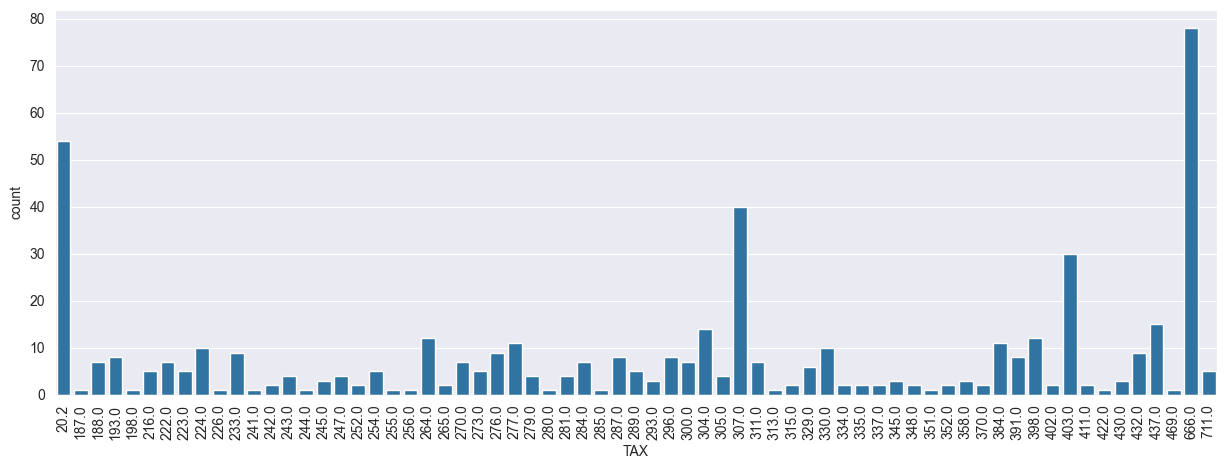

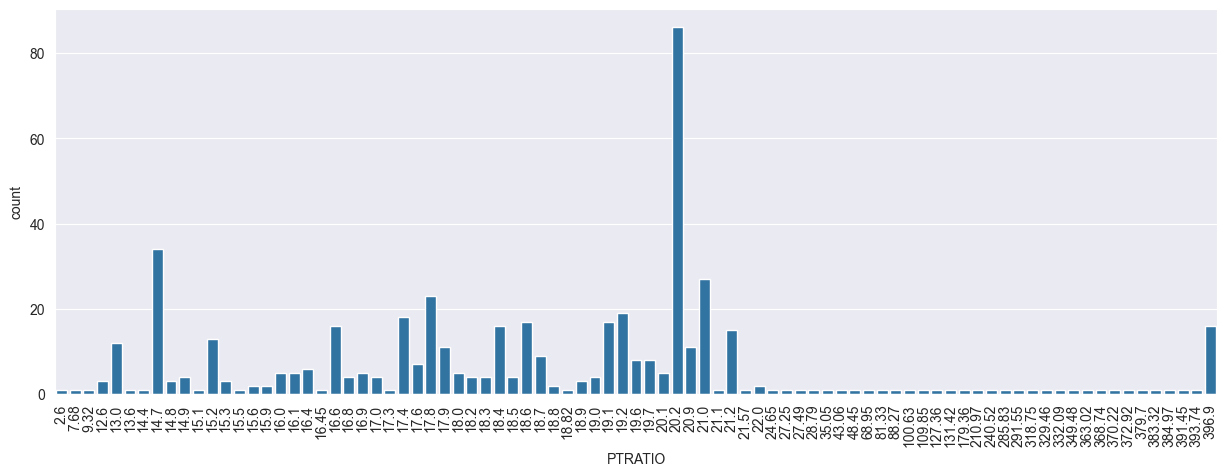

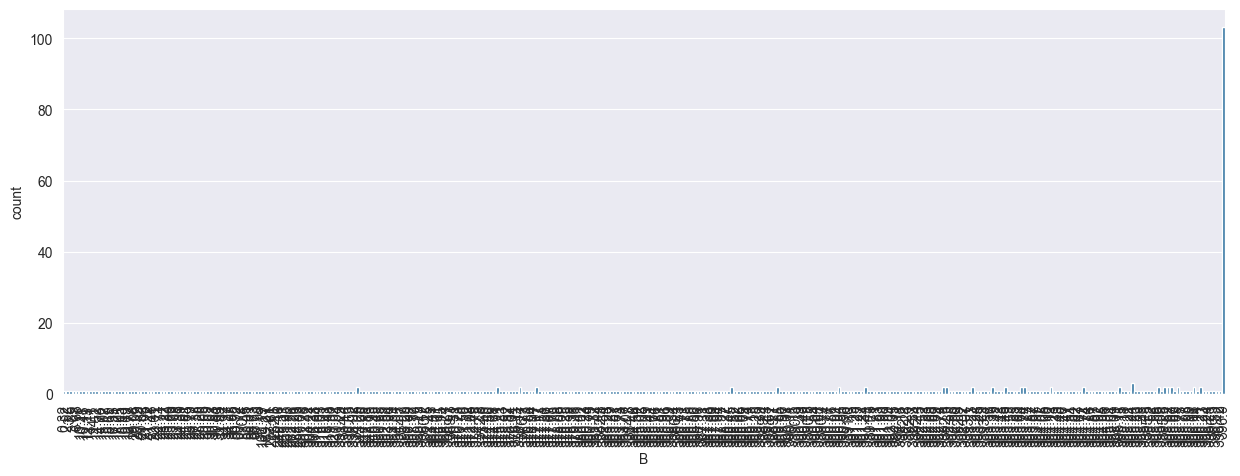

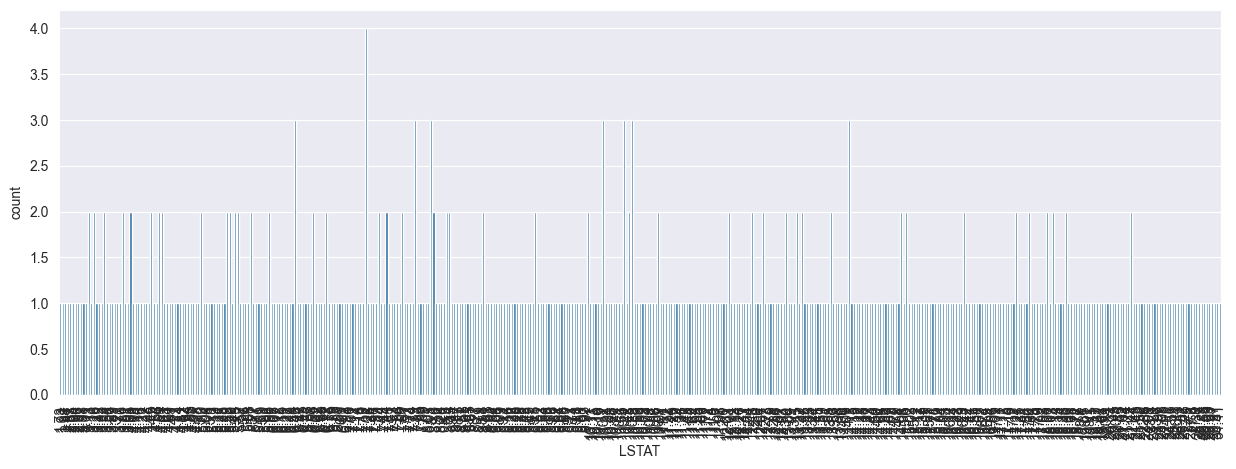

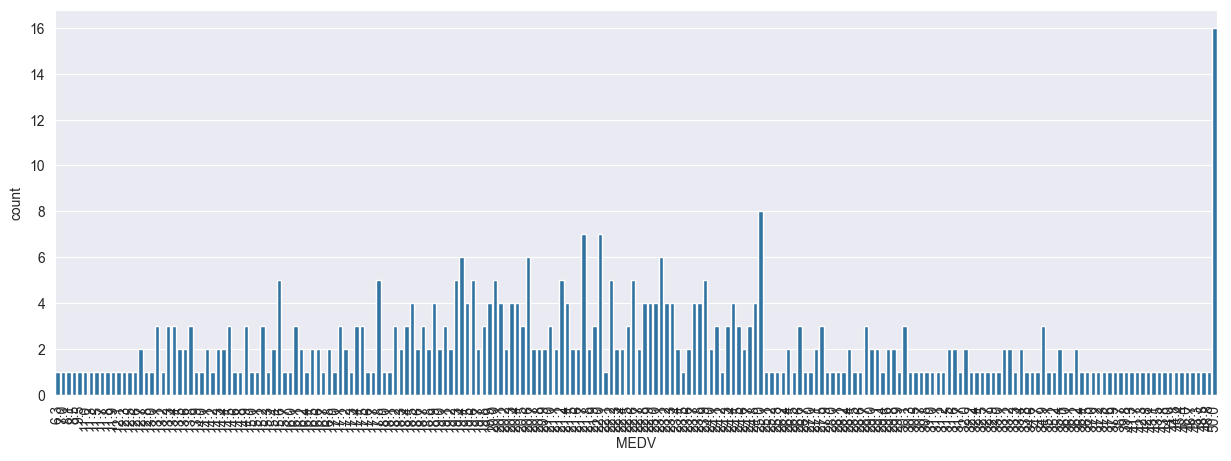

In [6]:
for column in dataset.columns:
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=90)
    sb.countplot(x=column,data=dataset)

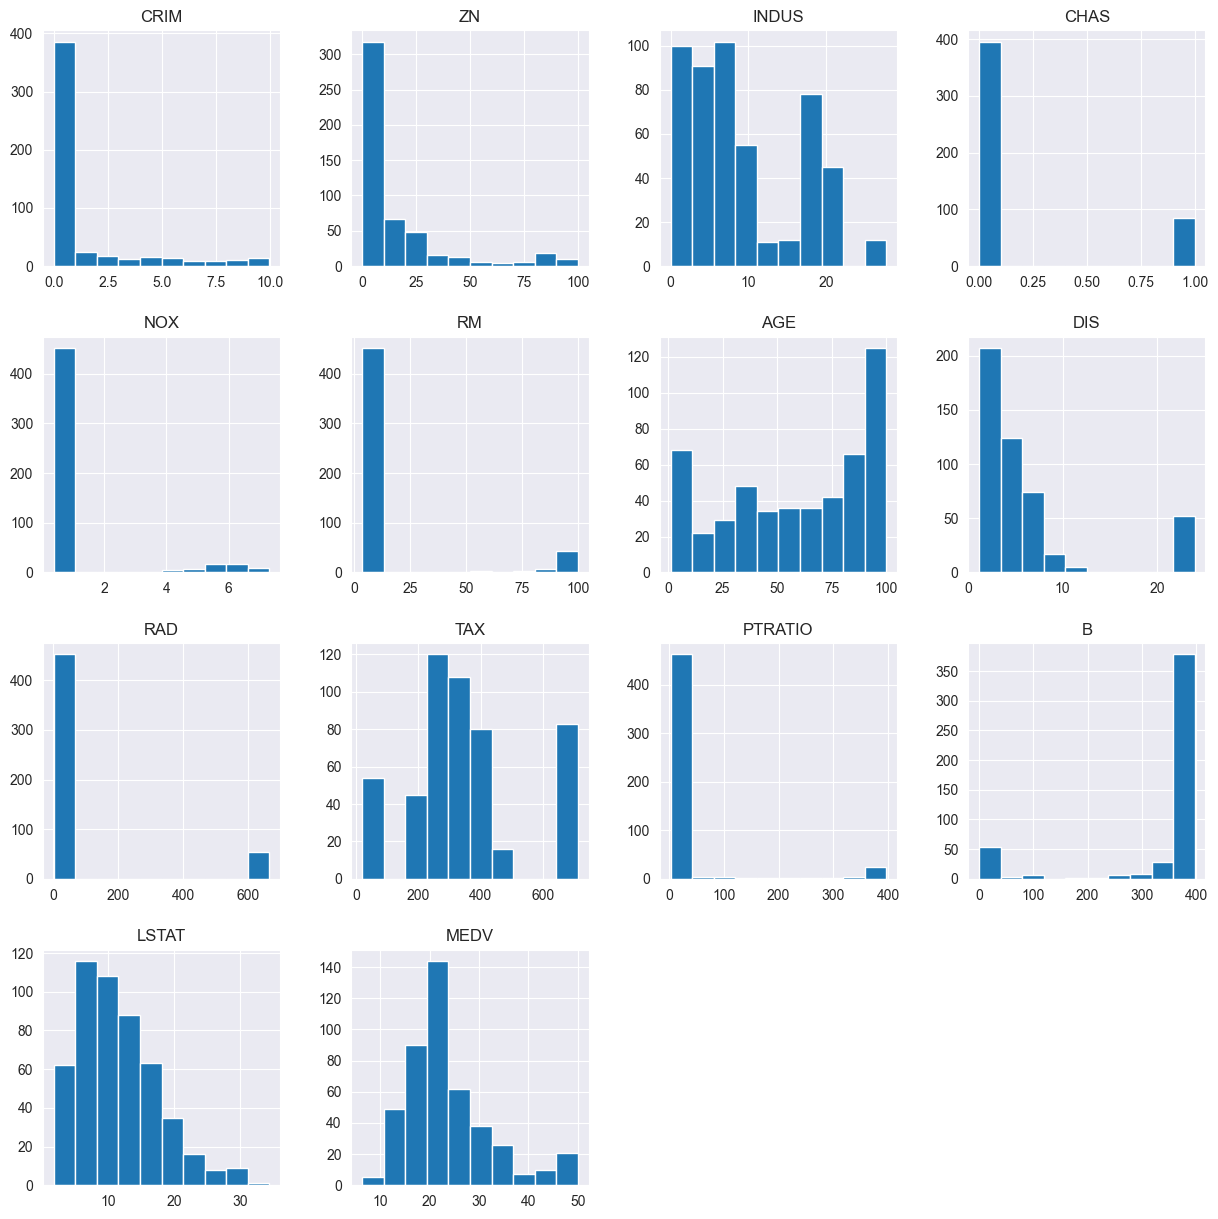

In [7]:
dataset.hist(figsize=(15,15))
plt.show()

<h2>4-relation between features</h2>
<p>The heatmap visually represents the correlation between different pairs of features. Each cell in the heatmap represents the correlation coefficient between two features, with colors indicating the strength and direction of the correlation. Positive correlations are typically represented by lighter colors, while negative correlations are represented by darker colors. A correlation coefficient close to 1 or -1 indicates a strong correlation, while a coefficient close to 0 indicates little to no correlation.</p>

<Axes: >

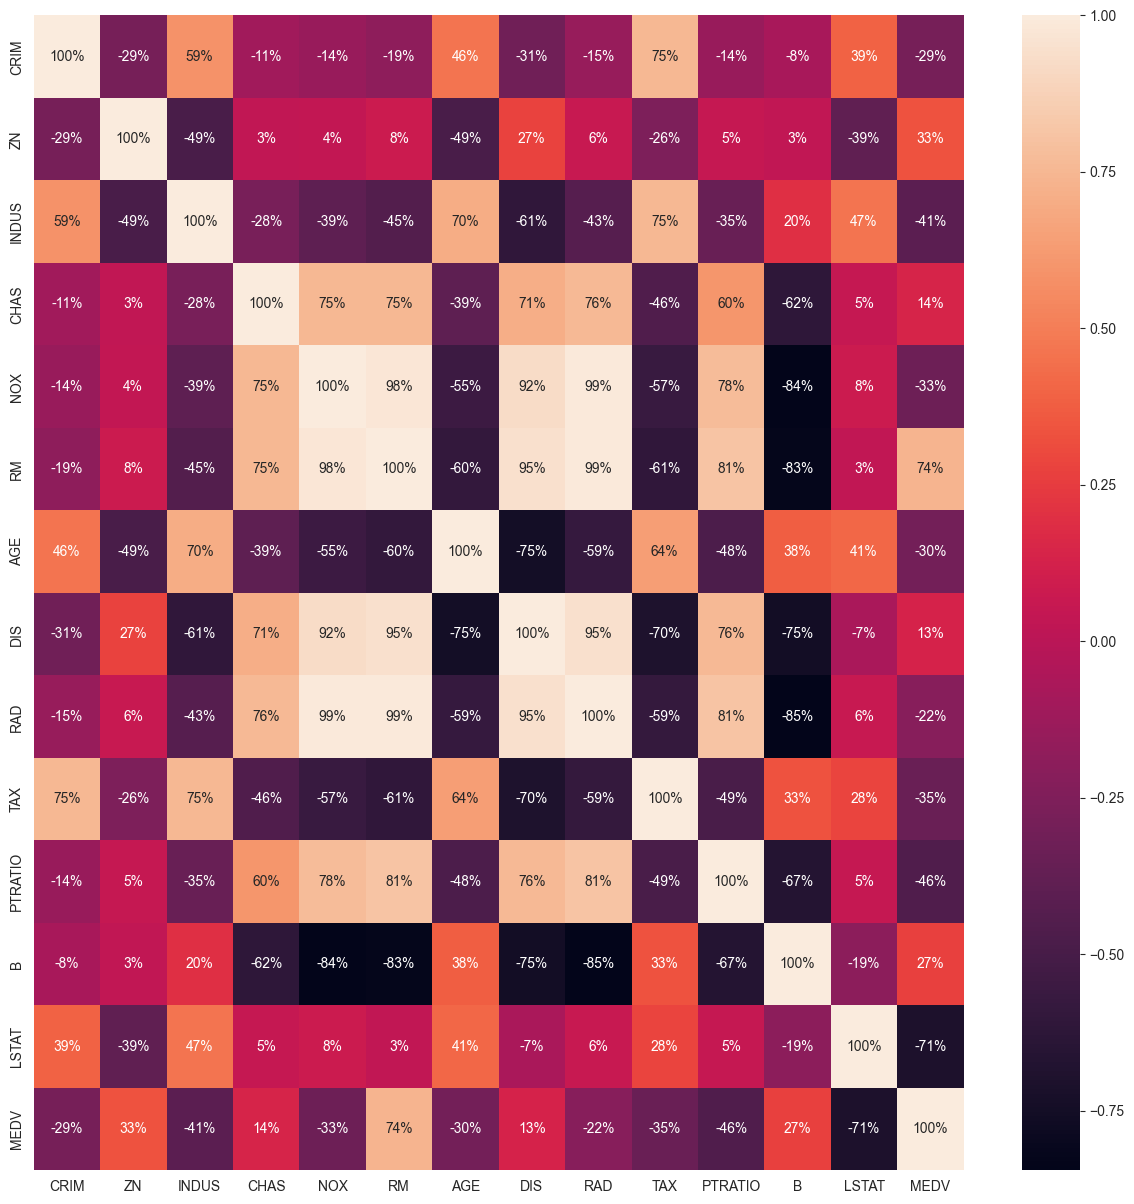

In [8]:
plt.figure(figsize=(15,15))
sb.heatmap(dataset.corr(),annot=True,fmt='.0%')

<h2>5-plotting scatter and hexbin</h2>
<ol>
<li><b>Scatter plot: </b><ul>
 <li>A scatter plot is a type of plot that displays individual data points as dots on a two-dimensional plane, with one variable on the x-axis and another variable on the y-axis.</li>
 <li>Each dot represents a single observation in the dataset, and the position of the dot corresponds to the values of the two variables it represents.</li>
 <li>Scatter plots are commonly used to visually assess the relationship or correlation between two variables. They are particularly useful for identifying patterns, trends, clusters, or outliers in the data.</li>
</ul></li>
<li><b>Hexbin plot: </b><ul>
<li>A hexbin plot is a type of two-dimensional histogram where the data space is divided into hexagonal bins, and the number of observations falling into each bin is represented by a color intensity or density.</li>
 <li>Similar to a scatter plot, a hexbin plot displays the relationship between two continuous variables. However, instead of plotting individual data points, hexbin plots aggregate the data into hexagonal bins and represent the density of observations within each bin.</li>
 <li>Hexbin plots are particularly useful for visualizing the distribution of large datasets, especially when there is overplotting in scatter plots, which occurs when multiple data points overlap.</li>
</ul></li>
</ol>

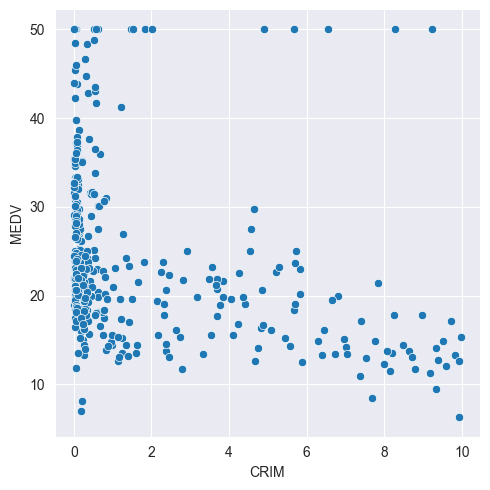

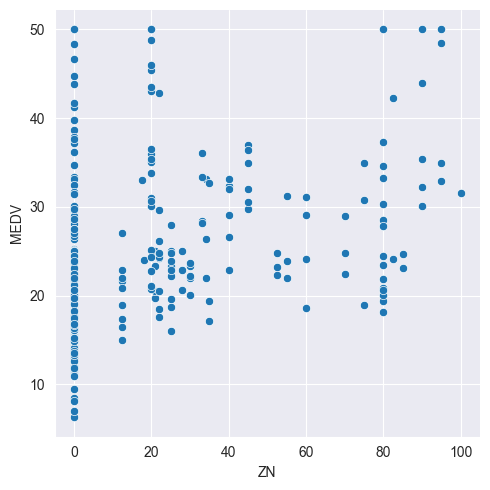

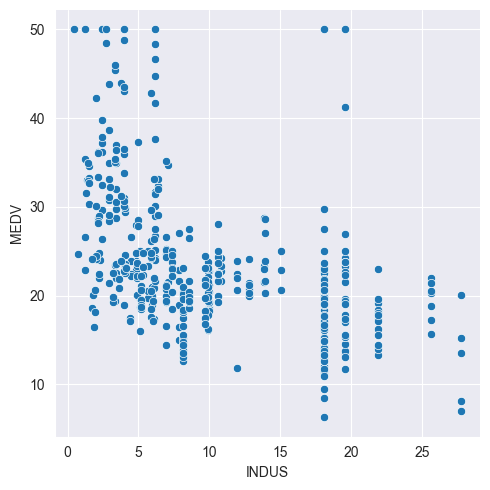

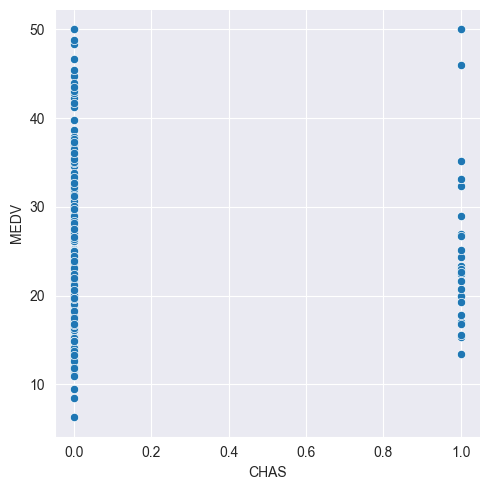

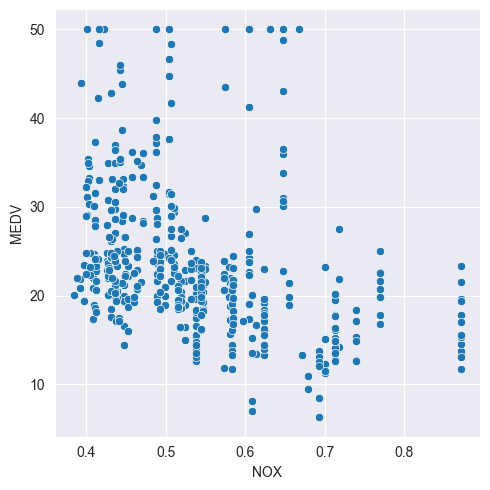

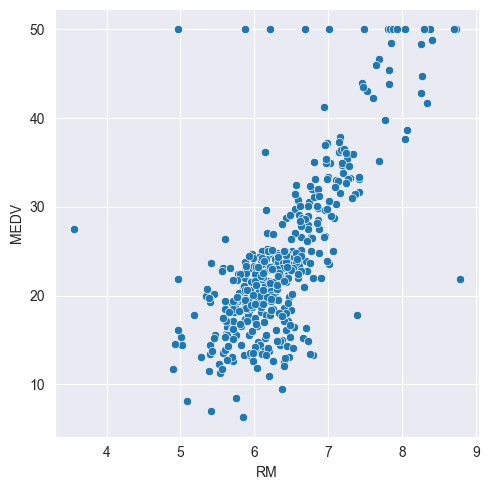

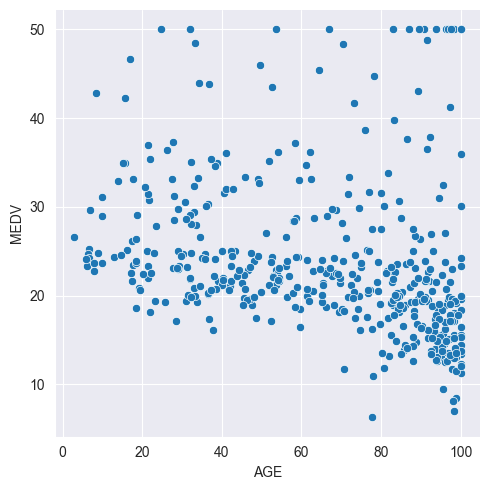

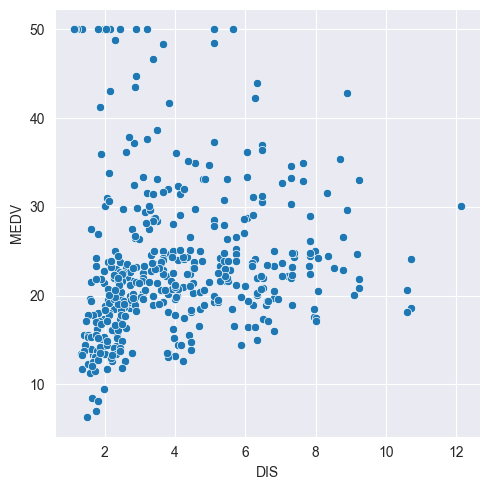

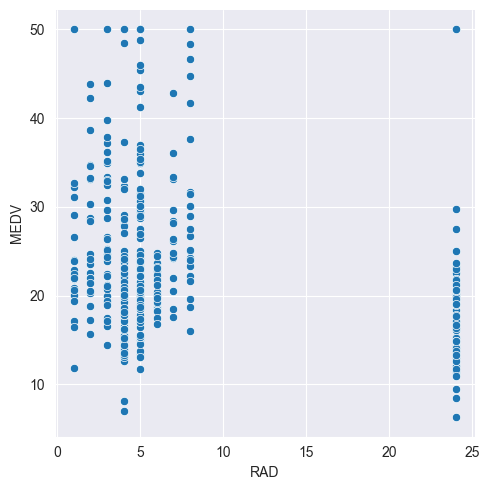

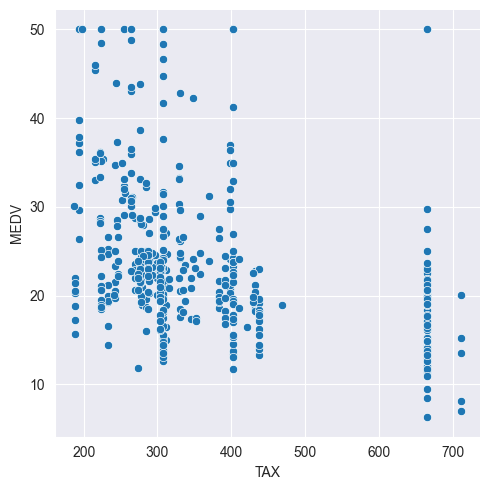

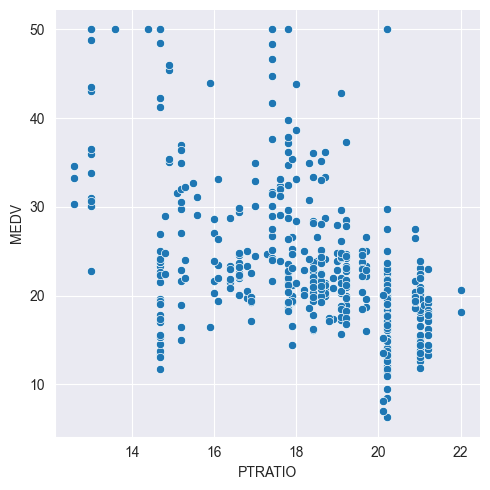

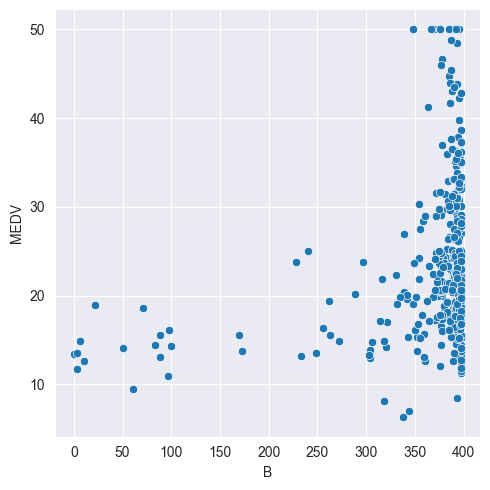

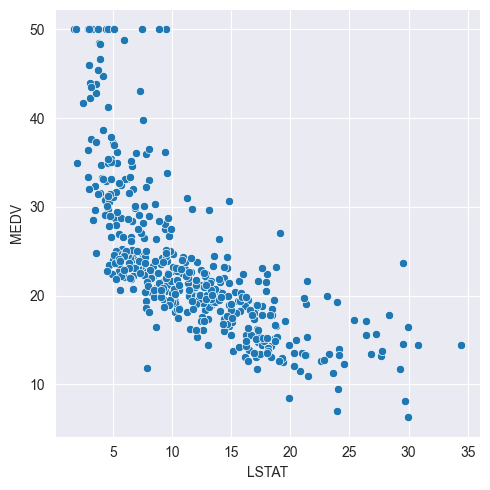

In [9]:
for column in dataset.columns:
    if column == 'MEDV':
        continue
    sb.relplot(x=column, y='MEDV', data=dataset, kind='scatter')

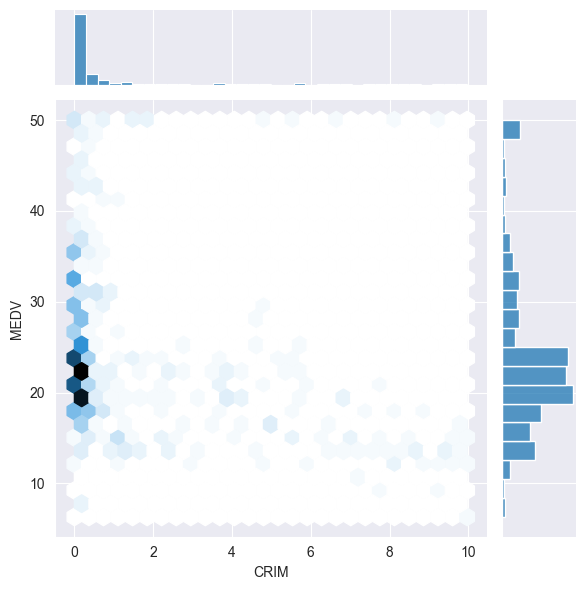

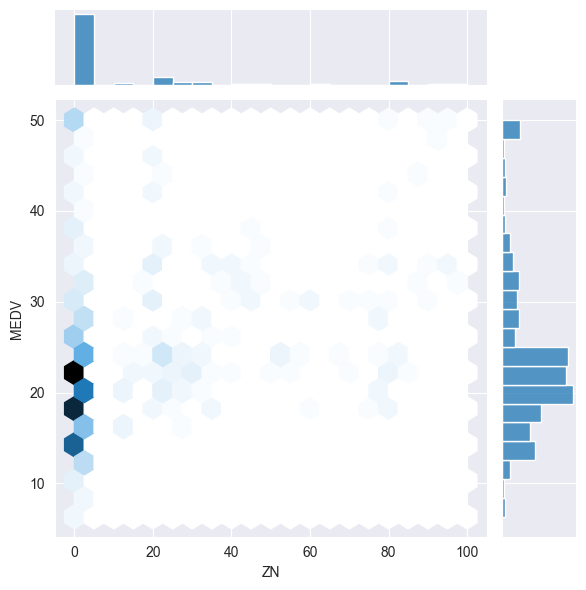

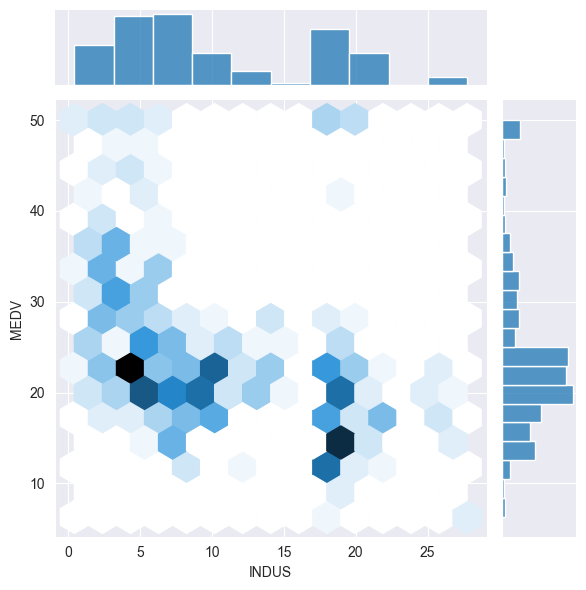

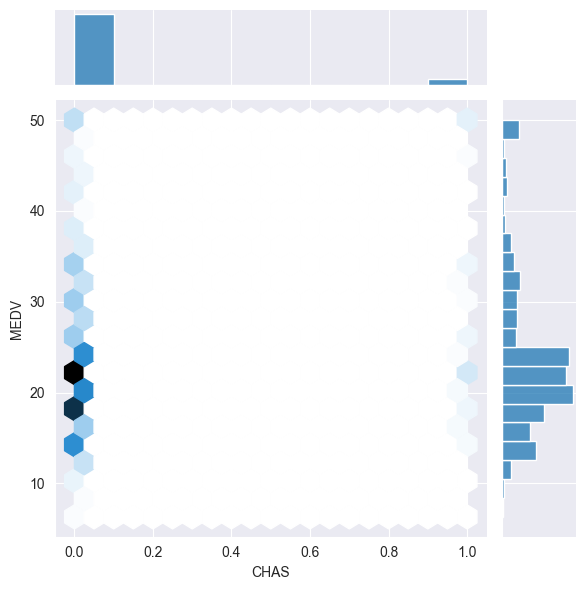

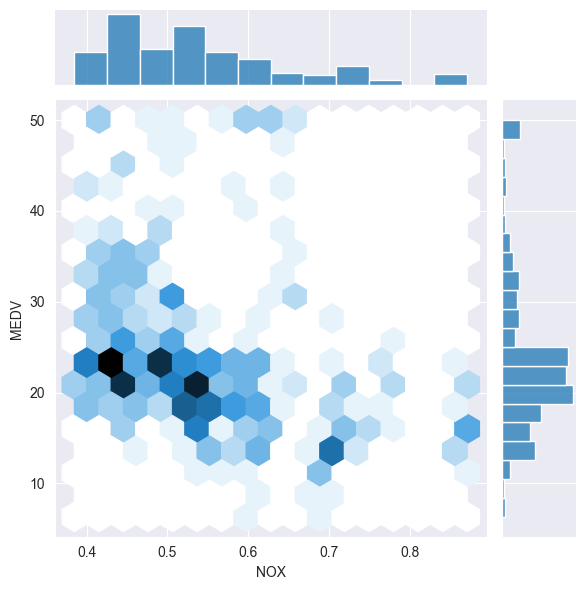

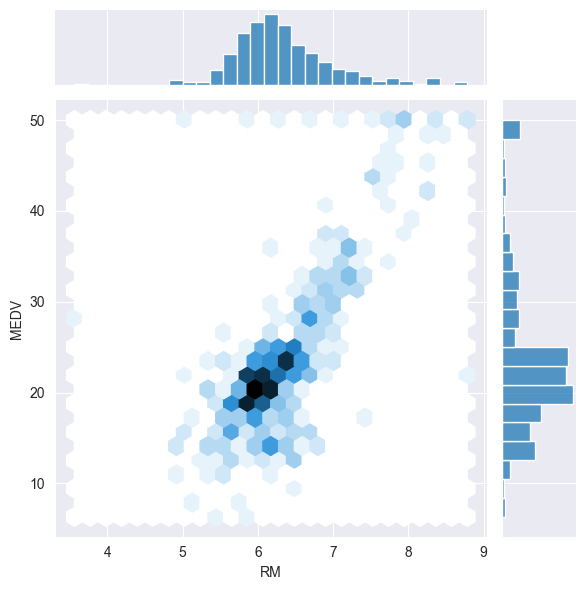

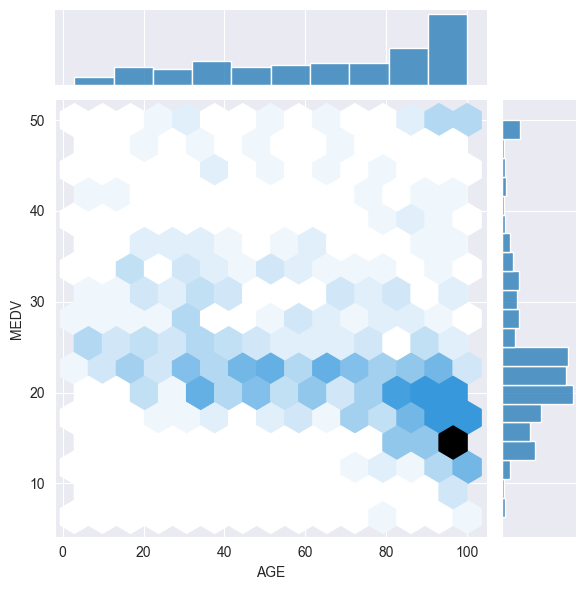

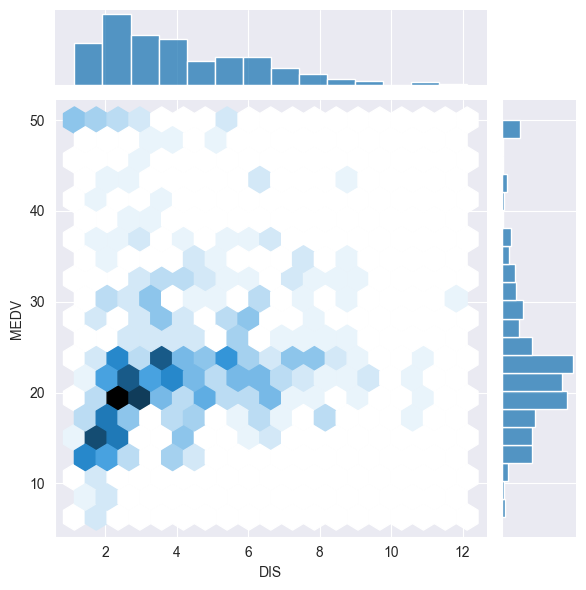

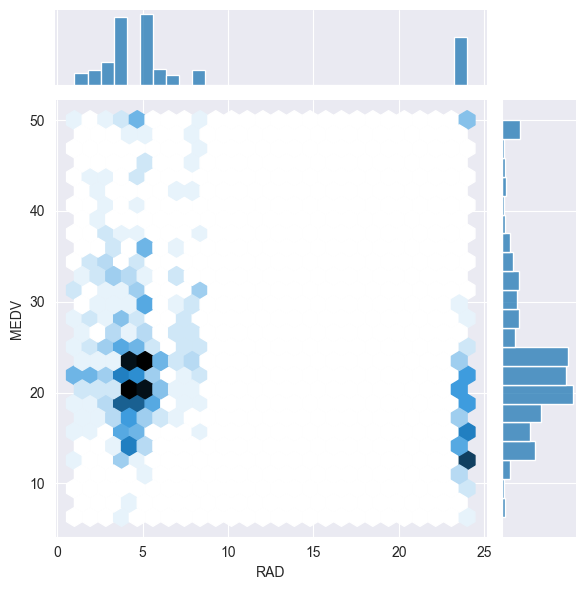

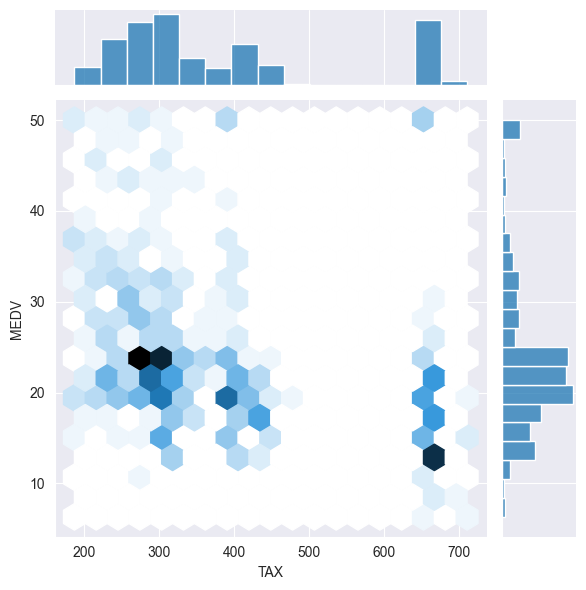

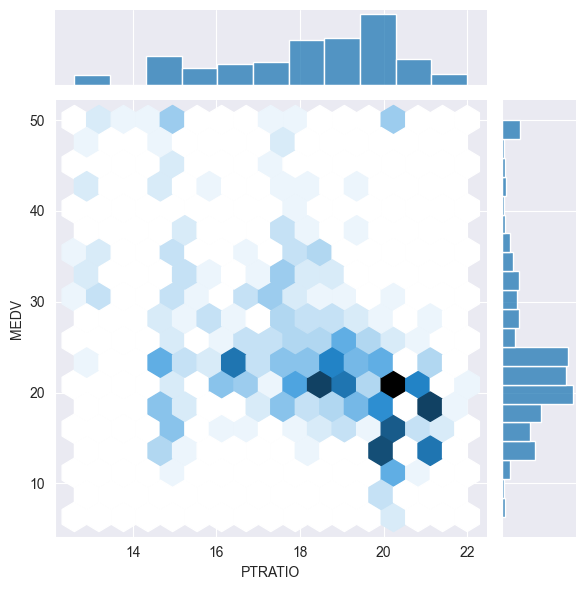

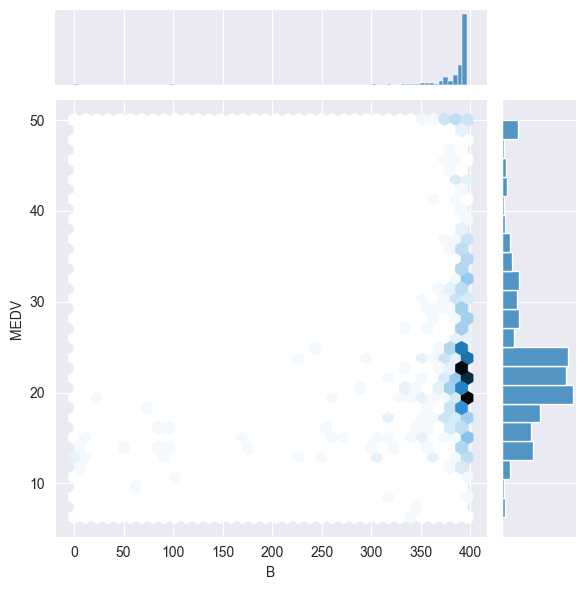

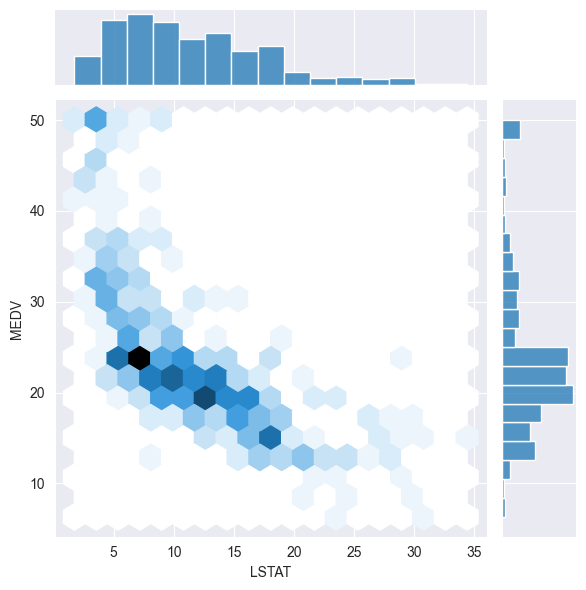

In [10]:
for column in dataset.columns:
    if column == 'MEDV':
        continue
    sb.jointplot(x=column, y='MEDV', data=dataset, kind='hex')

<hr/>
<h1>Part2:Preprocessing dataset</h1>
<h2>7-Filling missing values</h2>
<ol>
    <li><b>Mean/Median/Mode Imputation: </b>Replace missing values with the mean,std or mode of the column.These methods are simple and quick. They preserve the mean, median, or mode of the data, which can be important for some algorithms. However, they can introduce bias if the data is not normally distributed.</li>
    <li><b>Forward Fill/Backward Fill: </b> Replace missing values with the last or next observed value.Useful for time series data where missing values are likely to be continuous. However, they may not be suitable for all types of data and can propagate errors if the order of data is important.</li>
    <li><b>Interpolation: </b>Estimate missing values based on the linear or higher-order polynomial relationship between adjacent data points.this methods can capture trends in the data more accurately, especially when the data has a clear pattern or trend. However, they may not perform well if the data is highly irregular or noisy.</li>
    <li><b>K-Nearest Neighbors (KNN) Imputation: </b>Replace missing values with the mean/median/mode value of the K nearest neighbors of each sample with missing features.KNN imputation considers the similarity between data points, making it suitable for datasets where observations with similar features tend to have similar values.</li>
    <li><b>Random Imputation: </b>Replace missing values with randomly selected values from the distribution of non-missing values in the dataset.Random imputation can help preserve the variability of the data and avoid introducing biases that may occur with deterministic imputation methods. </li>
</ol>

In [6]:
mean_filled = dataset.fillna(dataset.mean())
forward_filled = dataset.ffill()
forward_filled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.171937,1.101175,15.679800,58.744660,6.154874,78.063241,339.317787,42.614980,333.611008,11.537806,23.051383
std,2.399207,23.048697,7.169630,0.377699,1.646991,27.220206,33.104049,6.479129,203.542157,180.670077,87.585243,124.371864,6.064932,9.146084
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500,17.200000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.690000,10.380000,21.200000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.307500,24.000000,403.000000,20.200000,395.620000,15.015000,25.000000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


<h2>KNN</h2>

In [7]:
imputer = KNNImputer(n_neighbors=4)
imputed = imputer.fit_transform(dataset)
imputed = pd.DataFrame(imputed,columns=dataset.columns)
imputed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,0.175395,1.101175,15.679800,58.744660,6.178012,78.063241,339.317787,42.614980,332.659837,11.537806,23.929348
std,2.399207,23.048697,7.169630,0.375608,1.646991,27.220206,33.104049,6.477634,203.542157,180.670077,87.585243,125.314512,6.064932,8.535035
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.426875,4.000000,254.000000,17.000000,364.385000,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.917500,5.000000,307.000000,18.900000,390.660000,10.380000,22.000000
75%,0.819623,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.600000,15.015000,25.975000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


<h2>8-Removing columns</h2>
<p>as CHAS and DIS columns has correlation less than 20% with target according to heatmap,we can remove them</p>

In [8]:
imputed.drop(['DIS', 'CHAS'], axis=1, inplace=True)
imputed.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.269195,13.295257,9.205158,1.101175,15.679800,58.744660,78.063241,339.317787,42.614980,332.659837,11.537806,23.929348
std,2.399207,23.048697,7.169630,1.646991,27.220206,33.104049,203.542157,180.670077,87.585243,125.314512,6.064932,8.535035
min,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.049443,0.000000,3.440000,0.449000,5.961500,32.000000,4.000000,254.000000,17.000000,364.385000,6.877500,19.000000
50%,0.144655,0.000000,6.960000,0.538000,6.322500,65.250000,5.000000,307.000000,18.900000,390.660000,10.380000,22.000000
75%,0.819623,18.100000,18.100000,0.647000,6.949000,89.975000,24.000000,403.000000,20.200000,395.600000,15.015000,25.975000
max,9.966540,100.000000,27.740000,7.313000,100.000000,100.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


<h2>9-Numerical and Categorical Features</h2>
<p><span style="color:green">Numerical features</span> are those that represent numerical values, which can be continuous or discrete.<span style="color:green">Categorical features</span>, on the other hand, represent values from a discrete set or category. These values are limited to a specific number of groups or categories. Examples of categorical features include: gender (male, female), color (red, blue, green), neighborhood (north, south, east, west), etc.</p>
<p>The main difference between numerical and categorical features lies in the type of information they provide. Numerical features usually provide information about the magnitude or quantity of something , whereas categorical features typically provide information about the type or category of something </p>
<b>in our dataset:
<ul>
   <li>Numeric: CIRM - ZN - INDUS - NOX - RM - AGE - DIS - TAX - PTRATIO - B - LSTAT - MEDV</li>
   <li>Categoric: CHAS - RAD - </li>
</ul>
</b>

<h2>10-Normalization and Standardizing</h2>
<p><span style="color:yellow">Normalization </span>scales the numerical features to a range between 0 and 1. It is particularly useful when the features have varying scales.<span style="color:yellow">Standardization </span>scales the numerical features to have a mean of 0 and a standard deviation of 1. It transforms the features so that they have a standard normal distribution, which is centered around zero with a unit standard deviation.</p>
<p>we can not use normalization because this methos is useful for algorithms which are based on distance like KNN or Neural Network.</p>
<p>we just standardize dataset to set each feature mean 0 and std to 1</p>

In [9]:
standardize = StandardScaler().fit_transform(imputed.drop('MEDV',axis=1))
standardize = pd.DataFrame(standardize,columns=imputed.columns[:-1])
standardize['MEDV'] = imputed['MEDV']
standardize.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,5.616939e-17,1.404235e-17,2.246775e-16,-5.616939e-17,-2.808469e-17,0.000000,-2.808469e-17,-4.212704e-17,2.808469e-17,-2.246775e-16,-6.494585e-17,23.929348
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,8.535035
min,-5.295298e-01,-5.774042e-01,-1.285180e+00,-4.352691e-01,-4.456540e-01,-1.741922,-3.789854e-01,-1.768049e+00,-4.573211e-01,-2.654670e+00,-1.618734e+00,6.300000
25%,-5.089015e-01,-5.774042e-01,-8.049040e-01,-3.963719e-01,-3.573785e-01,-0.808696,-3.642318e-01,-4.726971e-01,-2.927471e-01,2.534149e-01,-7.691625e-01,19.000000
50%,-4.691773e-01,-5.774042e-01,-3.134583e-01,-3.422804e-01,-3.441032e-01,0.196706,-3.593140e-01,-1.790544e-01,-2.710325e-01,4.632948e-01,-1.910907e-01,22.000000
75%,-1.875694e-01,2.086668e-01,1.241856e+00,-2.760336e-01,-3.210645e-01,0.944333,-2.658749e-01,3.528267e-01,-2.561751e-01,5.027546e-01,5.738951e-01,25.975000
max,3.628679e+00,3.765529e+00,2.587747e+00,3.775354e+00,3.100772e+00,1.247466,2.891384e+00,2.059279e+00,4.049034e+00,5.131388e-01,3.774952e+00,50.000000


<h2>11-Handling Categorical features</h2>
<p>For categorical features represented as strings or objects, several preprocessing techniques can be useful before training a machine learning model.</p>
<ol>
    <li><b>One-Hot Encoding: </b>This technique converts categorical variables into a binary format, where each category becomes a separate binary feature. For each categorical feature, if there are n unique categories, one-hot encoding creates n binary features, each representing one category. </li>
    <li><b>Label Encoding: </b> Label encoding assigns a unique integer to each category. This technique is useful when there is ordinality in the categories,when the categories have a natural order.</li>
    <li><b>Frequency Encoding: </b>Frequency encoding replaces each category with the frequency of that category in the dataset. This can be useful when the frequency of occurrence of categories is informative and may contribute to predicting the target variable.</li>
    <li><b>Target Encoding: </b>Target encoding replaces each category with the mean of the target variable for that category. This can be useful when there is a relationship between the categorical variable and the target variable.</li>
</ol>

<h2>12-Validation, Test and Train sets</h2>
<p>there are some methods to split data to test and train:</p>
<ul>
    <li>Randomly split the dataset into train and test sets: This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution.</li>
    <li>Split the dataset based on the time: This method is useful when we have a time series dataset. But it is not useful in this case</li>
    <li>Split the dataset based on the target: This method is useful when we have an imbalanced dataset.</li>
</ul>
<strong>Here we use first one and divide 80% train and 20% test.</strong>

<p>The <strong>random_state</strong> is the seed used by the random number generator. It is used to make the results reproducible. If we don't set the random_state, the results will be different every time we run the code.</p>
<h2>Validation</h2>
<p>Validation set is used to evaluate the performance of the model and prevent overfitting. We usually use this set to tune the hyperparameters of the model.</p>

<hr/>
<h1>Part3: Train, Testing and Evaluating the Models</h1>
<h2>14-super and unsupervised learning</h2>
<ol>
    <li><b>Unsupervised Models: </b>In these models, data is trained without any labels or supervision. Unsupervised learning models include clustering and data mining algorithms. Example: K-Means </li>
    <li><b>Semi-Supervised Models: </b>In these models, only some of the data has labels or supervision, while the rest is unlabeled. These models are typically used when labeled data is scarce. Example: Label propagation</li>
    <li><b>Reinforcement Learning Models: </b> In these models, the model learns by interacting with an environment, receiving rewards and penalties. They are usually used for problems where we need to make decisions in a dynamic and variable environment. Example: Training robots </li>
</ol>
<h2>15-what is Regression?</h2>
<p>Regression refers to a class of machine learning algorithms used for predicting a continuous variable based on other input features. This variable can be a dependent variable, response, or predicted variable. The main difference between regression and classification methods is that in regression, the dependent variable or response is continuous, whereas in classification, the response variable is discrete or categorical.</p>
<h2>16-Regression formula</h2>
<p>The formula for linear regression in its simplest form (with one independent variable) is:</p>
<p>y = B<sub>0</sub> + B<sub>1</sub>X</p>
<p>In this equation:</p>
<ul>
  <li><em>Y</em> is the dependent variable (the variable we are trying to predict).</li>
  <li><em>X</em> is the independent variable (the variable that we are using to make predictions).</li>
  <li><em>B<sub>0</sub></em> is the intercept, which represents the value of <em>Y</em> when <em>X</em> is zero.</li>
  <li><em>B<sub>1</sub></em> is the slope coefficient, which represents the change in <em>Y</em> for a one-unit change in <em>X</em>.</li>
</ul>
<p>The goal of linear regression is to find the values of B<sub>0</sub> and B<sub>1</sub> that minimize the difference between the actual values of <em>Y</em> and the values predicted by the linear equation. This is typically done using a method called least squares, which minimizes the sum of the squared differences between the observed and predicted values of <em>Y</em>.</p>


# Linear Regression

    Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [10]:
def linear_regression(input, output):
  x_mean = np.mean(input)
  y_mean = np.mean(output)
  
  numerator = np.sum((input - x_mean)*(output - y_mean))
  denominator = np.sum((input - x_mean)**2)
  
  slope = numerator/denominator
  intercept = y_mean - (slope * x_mean)
  
  return slope,intercept

  

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [11]:
def get_regression_predictions(input, intercept, slope):
    prediction = (slope * input) + intercept
    return prediction



Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [12]:
def get_root_mean_square_error(predicted_values, actual_values):
  squared = (predicted_values - actual_values)**2
  mean_squared = np.mean(squared)
  root_mean_squared_error = np.sqrt(mean_squared)
  return root_mean_squared_error

inp = np.array([11,2,5,4,3,9,1])
out = np.array([4,12,10,5,3,0,7])
a,b = linear_regression(inp,out)
pre = get_regression_predictions(inp,b,a)

print(get_root_mean_square_error(pre,out))

3.1878705535204825


The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [13]:
def get_r2_score(predicted_values, actual_values):
  actual_mean = np.mean(actual_values)
  residual_sum = np.sum((actual_values - predicted_values)**2)
  total_sum = np.sum((actual_values - actual_mean)**2)
  r2_square = 1 - (residual_sum/total_sum)
  return r2_square

inp = np.array([11,2,5,4,3,9,1])
out = np.array([4,12,10,5,3,0,7])
a,b = linear_regression(inp,out)
pre = get_regression_predictions(inp,b,a)

print(get_r2_score(pre,out))


0.30838414634146327


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [14]:
designated_feature_list = imputed.columns[:-1]
output = imputed["MEDV"].values

for feature in designated_feature_list:
   
    input_feature = imputed[feature].values
    
    slope,intercept = linear_regression(input_feature, output)
    
    predicted_values = get_regression_predictions(input_feature, intercept, slope)
    
    root_square_mean_error = get_root_mean_square_error(predicted_values, output)
    
    r2_score = get_r2_score(predicted_values, output)
    
    print("Feature:", feature)
    print("RMSE:", root_square_mean_error)
    print("R2 Score:", r2_score)
    print("---------------------")
      


Feature: CRIM
RMSE: 8.171522680755695
R2 Score: 0.0815520793630683
---------------------
Feature: ZN
RMSE: 8.058075500528659
R2 Score: 0.10687711281229473
---------------------
Feature: INDUS
RMSE: 7.862566105629912
R2 Score: 0.14969022036156132
---------------------
Feature: NOX
RMSE: 8.520245356947898
R2 Score: 0.0014892222893452267
---------------------
Feature: RM
RMSE: 8.498968821573348
R2 Score: 0.006469906049326513
---------------------
Feature: AGE
RMSE: 8.207184027696178
R2 Score: 0.07351818895694995
---------------------
Feature: RAD
RMSE: 8.514511196434693
R2 Score: 0.0028327738305009564
---------------------
Feature: TAX
RMSE: 8.122693597905013
R2 Score: 0.09249568911981443
---------------------
Feature: PTRATIO
RMSE: 8.524180878857216
R2 Score: 0.0005665801733810705
---------------------
Feature: B
RMSE: 8.49679986164944
R2 Score: 0.006976944498485738
---------------------
Feature: LSTAT
RMSE: 6.465741741893661
R2 Score: 0.4249769393605418
---------------------


<h2>17-which feature?</h2>
<p>Since the <span style="color:blue">LSTAT</span> has a more linear relationship with the target than the rest of the features, it is more suitable for use here in linear Regression method</p>

## 18-Validation identifier

- **MSE:** Mean Squared Error (MSE) is a common measure of the average squared difference between the predicted and actual values in a regression problem.

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

- **RMSE:** Root Mean Squared Error (RMSE) is the square root of the Mean Squared Error (MSE).

$$ \text{RMSE} = \sqrt{\text{MSE}} $$

- **R2_Score:** R-squared (R2) Score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model.

$$ R^2 = 1 - \frac{\text{RSS}}{\text{TSS}} $$

- **RSS:** Residual Sum of Squares (RSS) is the sum of the squared differences between the actual values and the predicted values.

$$ \text{RSS} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$


<h2>20-Plotting Scatter for model validation</h2>

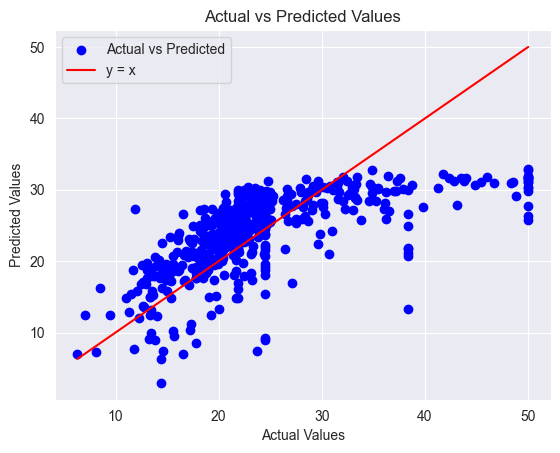

In [15]:
input = imputed["LSTAT"].values
    
slope,intercept = linear_regression(input, imputed["MEDV"].values)
    
predicted_values = get_regression_predictions(input, intercept, slope)

plt.scatter(imputed["MEDV"], predicted_values, color='blue', label='Actual vs Predicted')

x_line = [min(imputed["MEDV"].values), max(imputed["MEDV"].values)]
plt.plot(x_line, x_line, color='red', label='y = x')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.legend()

plt.show()


<h1>Part3: Classification</h1>
<h2>21-decision tree</h2>
<p>Pruning in decision trees is a technique used to reduce the size of the tree by removing nodes that are not providing significant predictive power or are likely to be overfitting the training data. Pruning helps prevent overfitting, which occurs when the decision tree captures noise or outliers in the training data, leading to poor generalization to new, unseen data.</p>
<h3>Advantages</h3>
    <ul>
        <li>Prevents Overfitting</li>
        <li>Reduces Computational Complexity</li>
    </ul>
<h3>disAdvantages</h3>
    <ul>
        <li>Loss of Information</li>
        <li>Potential Underfitting</li>
    </ul>
<h2>22-Using decision tree</h2>
    <p>Using decision trees may have advantages over other models in the following situations:</p>    
    <ul>
        <li>Interpretability: Decision trees are highly interpretable due to their simple and intuitive structure. They can be useful for understanding patterns in data and can be used for decision-making and strategic purposes.</li>
        <li>Handling multiple factors: Decision trees can examine various factors and their relationships with the response variable without making prior assumptions about the distribution of data or linear relationships.</li>
        <li>Non-linear relationships: Decision trees can accommodate non-linear patterns in the data, such as cases where the relationship between features and the response variable is not linear.</li>
    </ul>
<h2>23-KNN different</h2>
    <p>there are some markable different between KNN and other classification methods:</p>
     <ul>
        <li>KNN is an instance-based learning algorithm, meaning it does not explicitly learn a model during training. Instead, it memorizes the entire training dataset and classifies new instances based on their similarity to existing instances in the feature space.</li>
        <li>KNN determines the class of a new instance based on the majority class of its k nearest neighbors in the feature space. The decision boundary in KNN is flexible and can be highly non-linear.</li>
        <li>KNN can handle missing values by imputing them based on the values of the nearest neighbors.</li>
        <li>KNN makes predictions based on local information, considering only the k nearest neighbors of each instance. It does not attempt to learn global patterns or relationships in the data.</li>
    </ul>


<h2>24-One nearest neighbour</h2>
<p>it is likely work as KNN with only comparing the class of nearet neighbour.</p>
<b>Advantage:</b>
<p>Simplicity-Non-parametric</p>
<b>disAdvantage:</b>
<p>Sensitive to Noisy Data-Scaling with Dimensionality</p>

<h2>25-other KNN distance functions</h2>
<ol>
    <li>Euclidean Distance</li>
    <p>$$d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}$$</p>
    <li>Manhattan Distance</li>
    <p>$$d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} |q_i - p_i|$$</p>
    <li>Minkowski Distance</li>
    <p>$$d(\mathbf{p}, \mathbf{q}) = \left( \sum_{i=1}^{n} |q_i - p_i|^p \right)^{\frac{1}{p}}$$</p>
</ol>

<h2>26-implement Decision tree and KNN</h2>

In [16]:
deciles = imputed['MEDV'].quantile([0.2, 0.4, 0.6, 0.8])

luxury_threshold = deciles.iloc[-1]
economic_threshold = deciles.iloc[0]

imputed['HCAT'] = "ordinary"
imputed.loc[imputed['MEDV'] >= luxury_threshold, 'HCAT'] = "luxury"
imputed.loc[imputed['MEDV'] <= economic_threshold, 'HCAT'] = "economy"

dt_classifier = DecisionTreeClassifier(max_depth=None)
knn_classifier = KNeighborsClassifier(n_neighbors=8 ,metric="manhattan",weights="distance")

X_train , X_test , y_train , y_test = train_test_split(imputed.drop('HCAT', axis=1), imputed['HCAT'], test_size=0.2, random_state=42)

dt_classifier.fit(X_train,y_train)
knn_classifier.fit(X_train,y_train)

dt_predict = dt_classifier.predict(X_test)
knn_predict = knn_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_predict)
knn_accuracy = accuracy_score(y_test,knn_predict)

print("Decision tree Accuracy: ",dt_accuracy)
print("KNN Accuracy: ",knn_accuracy)

Decision tree Accuracy:  1.0
KNN Accuracy:  0.8235294117647058


<h2>27-GridSearchCV</h2>

In [17]:
dt_param_grid = {'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

knn_param_grid = {'n_neighbors': [3, 5, 7, 9],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree:", dt_grid_search.best_params_)
print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)

Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


<h2>28-Plotting decision tree</h2>

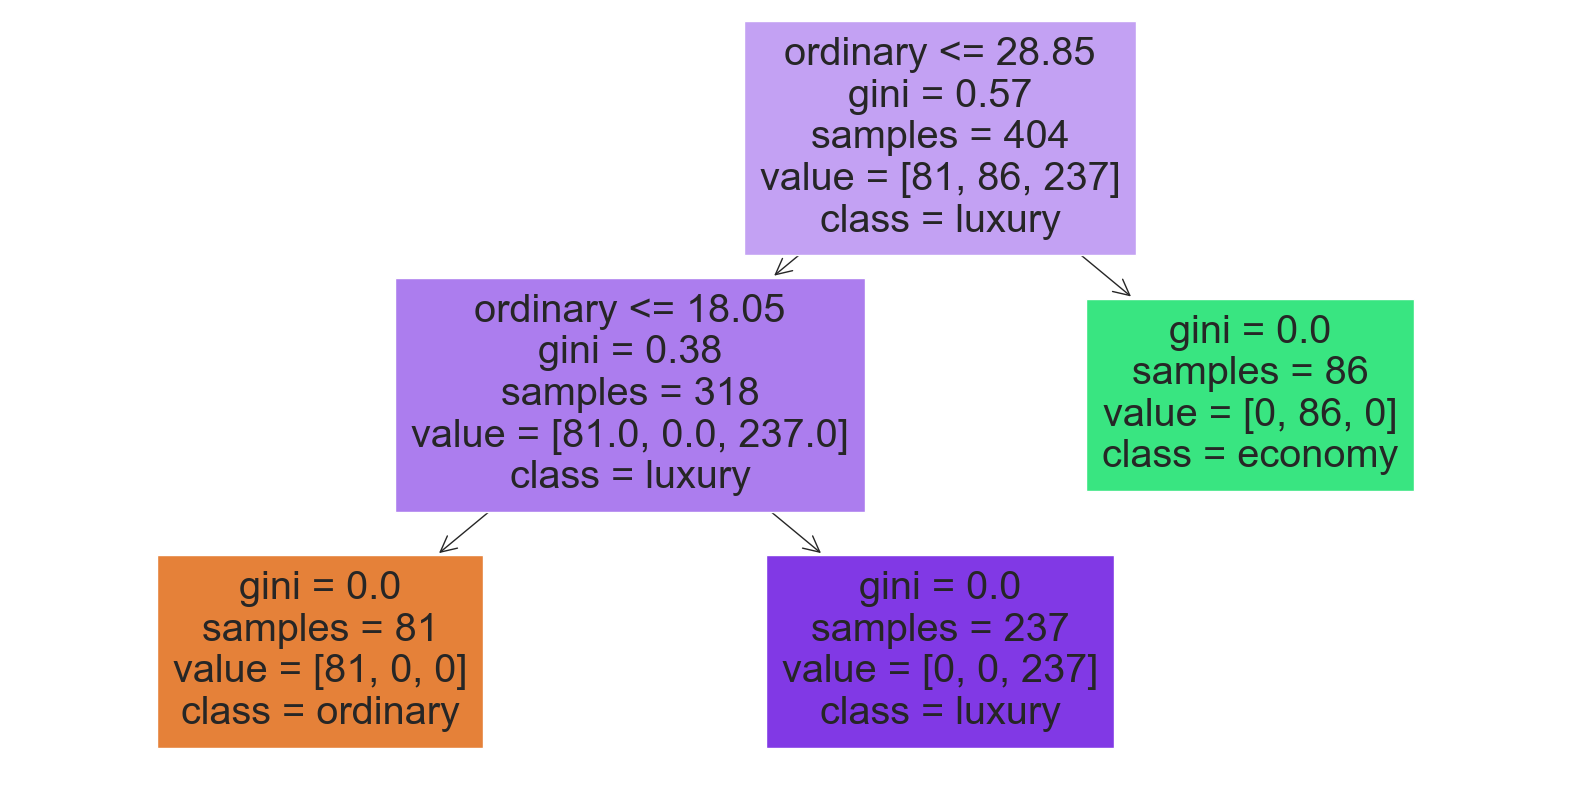

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier,filled=True,feature_names=imputed["HCAT"],class_names=["ordinary","economy","luxury"])
plt.show()

<h2>29-Under and overfitting</h2>
<p>Underfitting and overfitting are two common problems in machine learning models that arise during the training process. They occur due to the model's inability to generalize well to unseen data.</p>
<ol>
    <li><b>Underfitting: </b>Underfitting occurs when a model is too simple to capture the underlying patterns in the data.</li>
    <li><b>Overfitting: </b>Overfitting occurs when a model learns the training data too well, including the noise and fluctuations in the data.</li>
</ol>
<strong>it seems in our model we haven't these two problem as we have enough number of data and also we don't have noise or irrelevant data</strong>


<hr/>
<h1>Part4: Ensemble</h1>
<h2>30-why?</h2>
<p>Ensemble methods are used in machine learning for improving the performance and robustness of models by combining multiple base models. They can lead to better predictive performance compared to individual models by leveraging the wisdom of crowds and reducing the risk of overfitting. Here are some reasons why ensemble methods are used:</p>
<ul>
    <li>Improved Performance</li>
    <li>Reduced Overfitting</li>
    <li>Versatility</li>
</ul>
<h2>31-Bagging and Boosting</h2>
<p>Bootstrap aggregating (bagging) involves training multiple base models on bootstrap samples of the training data and averaging their predictions.but  Boosting algorithms train base models sequentially, where each subsequent model focuses on the instances that were misclassified by the previous models.</p>
<h2>32-Random Forest</h2>
<p>Random Forest is an ensemble learning method used for classification, regression, and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.</p>
<ol>
    <li>Bootstrapping</li>
    <li>Decision Tree Construction</li>
    <li>Voting or Averaging</li>
</ol>
<h2>33-Bootstrapping</h2>
<p>as mentioned before,Bootstrapping in the context of Random Forest refers to the process of creating multiple subsets of the original training data by sampling with replacement. This process is used to introduce randomness and diversity among the decision trees in the forest</p>
<h2>34-number of trees</h2>
<p>certainly the number of trees in forest is effective on our time and memory complezity but by experiment is suggest that a random forest should have a number of trees between 64 - 128 trees.</p>
<h2>35-is it always usefull?</h2>
<p>Using Random Forest for machine learning problems is highly effective in many cases, but it's not always suitable.When your dataset is large and you're looking for a model with high accuracy and good performance on test data, using Random Forest may be very suitable.or When your problem is complex and the relationships between variables are intricate, Random Forest can improve the model's performance.<b>but</b> If your data is relatively small,or where interpretability of the model is required using Random Forest may lead to models with lower accuracy.</p>
<h2>36-effect on Variance</h2>
<p>the Random Forest generally has bellow effects on dataset Variance:</p>
<ul>
    <li>Reduction in Variance</li>
    <li>Balancing Variance and Standard Deviation</li>
    <li>Preservation (or Increase) in Variance</li>
</ul>

In [19]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2',None]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1,error_score="raise")
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_classifier = RandomForestClassifier(**grid_search.best_params_)
best_rf_classifier.fit(X_train, y_train)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(n_estimators=200)

<h2>37-HyperParameters</h2>
<ul>
    <li><b>n_estimators: </b>The number of decision trees in the forest</li>
    <li><b>max_depth: </b>The maximum depth of each decision tree in the forest</li>
    <li><b>min_samples_split: </b>The minimum number of samples required to split an internal node. </li>
    <li><b>min_samples_leaf: </b>The minimum number of samples required to be at a leaf node.</li>
    <li><b>max_features: </b>The number of features to consider when looking for the best split. </li>
</ul>

<hr/>
<h1>Part5:SVM</h1>

In [26]:
rbf_classifier = SVC(kernel="rbf")
linear_classifier = SVC(kernel="linear")

rbf_classifier.fit(X_train,y_train)
linear_classifier.fit(X_train,y_train)
rbf_predict = rbf_classifier.predict(X_test)
linear_predict = linear_classifier.predict(X_test)
rbf_confusion_matrix = confusion_matrix(y_test,rbf_predict)
linear_confusion_matrix = confusion_matrix(y_test,linear_predict)

rbf_accuracy = accuracy_score(y_test, rbf_predict)
linear_accuracy = accuracy_score(y_test, linear_predict)
rbf_report = classification_report(y_test, rbf_predict,zero_division=1)
linear_report = classification_report(y_test, linear_predict,zero_division=1)

print("RBF Kernel:")
print("Confusion Matrix:\n", rbf_confusion_matrix)
print("Accuracy:", rbf_accuracy)
print("Classification Report:\n", rbf_report)

print("\nLinear Kernel:")
print("Confusion Matrix:\n", linear_confusion_matrix)
print("Accuracy:", linear_accuracy)
print("Classification Report:\n", linear_report)

RBF Kernel:
Confusion Matrix:
 [[ 8  0 13]
 [ 1  0 15]
 [ 4  0 61]]
Accuracy: 0.6764705882352942
Classification Report:
               precision    recall  f1-score   support

     economy       0.62      0.38      0.47        21
      luxury       1.00      0.00      0.00        16
    ordinary       0.69      0.94      0.79        65

    accuracy                           0.68       102
   macro avg       0.77      0.44      0.42       102
weighted avg       0.72      0.68      0.60       102


Linear Kernel:
Confusion Matrix:
 [[21  0  0]
 [ 1 15  0]
 [ 1  0 64]]
Accuracy: 0.9803921568627451
Classification Report:
               precision    recall  f1-score   support

     economy       0.91      1.00      0.95        21
      luxury       1.00      0.94      0.97        16
    ordinary       1.00      0.98      0.99        65

    accuracy                           0.98       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.98      0.98      0.98    

In [32]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
}

param_dist = {
    'C': [0.2, 4, 15, 200],
    'gamma': [0.1, 1, 3, 7],
}

rbf_classifier = SVC(kernel='rbf')
linear_classifier = SVC(kernel='linear')

rbf_grid_search = GridSearchCV(rbf_classifier, param_grid, cv=5)
rbf_random_search = RandomizedSearchCV(rbf_classifier, param_dist, cv=5, n_iter=10, random_state=39)
linear_grid_search = GridSearchCV(linear_classifier, param_grid, cv=5)
linear_random_search = RandomizedSearchCV(linear_classifier, param_dist, cv=5, n_iter=10, random_state=39)


rbf_grid_search.fit(X_train, y_train)
rbf_random_search.fit(X_train, y_train)
linear_grid_search.fit(X_train, y_train)
linear_random_search.fit(X_train, y_train)

rbf_accuracy_grid = accuracy_score(y_test, rbf_grid_search.predict(X_test))
rbf_accuracy_random = accuracy_score(y_test, rbf_random_search.predict(X_test))
linear_accuracy_grid = accuracy_score(y_test, linear_grid_search.predict(X_test))
linear_accuracy_random = accuracy_score(y_test, linear_random_search.predict(X_test))

print("RBF Kernel - GridSearchCV Accuracy:", rbf_accuracy_grid)
print("RBF Kernel - RandomizedSearchCV Accuracy:", rbf_accuracy_random)
print("Linear Kernel - GridSearchCV Accuracy:", linear_accuracy_grid)
print("Linear Kernel - RandomizedSearchCV Accuracy:", linear_accuracy_random)

RBF Kernel - GridSearchCV Accuracy: 0.9019607843137255
RBF Kernel - RandomizedSearchCV Accuracy: 0.6568627450980392
Linear Kernel - GridSearchCV Accuracy: 0.9803921568627451
Linear Kernel - RandomizedSearchCV Accuracy: 0.9803921568627451


<b>as out dataset space is not so big we can use GridSearch here</b>

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [22]:
def polynomial_regression(x, y, degree):
  pass
  #TO DO

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [23]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [24]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [25]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

IndentationError: expected an indented block after 'while' statement on line 4 (2055937987.py, line 17)

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias